In [34]:
# Importing required libraries -

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [35]:
# Configuring the notebook -

import warnings
warnings.simplefilter('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.float_format', lambda x: '%.3f' % x)

sns.set_style('whitegrid')

%matplotlib inline

In [36]:
# Loading the dataset -

filepath = r'/Users/kumarpersonal/Downloads/Heart-Disease-Pred/Data/merge_data_2.csv'
df = pd.read_csv(filepath)

In [37]:
df.columns

Index(['NAME', 'AGE', 'GENDER', 'CHEST PAIN', 'RESTING BP', 'SERUM CHOLESTROL',
       'TRI GLYCERIDE', 'LDL', 'HDL', 'FBS', 'RESTING ECG', 'MAX HEART RATE',
       'ECHO', 'TMT', 'ANGIOGRAPHY', 'DISEASE'],
      dtype='object')

In [38]:
df.sample(5)

,NAME,AGE,GENDER,CHEST PAIN,RESTING BP,SERUM CHOLESTROL,TRI GLYCERIDE,LDL,HDL,FBS,RESTING ECG,MAX HEART RATE,ECHO,TMT,ANGIOGRAPHY,DISEASE
1537,bheemarapu sambaiah,62,M,0,130,NaN,NaN,NaN,NaN,79.000,1,78,35.000,NaN,NaN,1
517,K.Ravikumar,40,M,0,120,180.000,139.000,112.000,41.000,110.000,0,78,67.000,1.000,NaN,1
60,Ramesh rupika,37,1,0,120,NaN,NaN,NaN,NaN,99.000,AB,78,NaN,NaN,NaN,1
974,Kavya sree,55,F,0,130,NaN,NaN,NaN,NaN,89.000,1,78,82.000,NaN,NaN,1
17,George Reddy,76,1,1,120,NaN,NaN,NaN,NaN,97.000,AB,68,59.000,1.000,NaN,1


In [39]:
# Shape of the dataset -

print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 1656
No. of cols: 16


In [40]:
# Checking the data type -

df.info(null_counts=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1656 entries, 0 to 1655
Data columns (total 16 columns):
 #   Column            Dtype  
---  ------            -----  
 0   NAME              object 
 1   AGE               int64  
 2   GENDER            object 
 3   CHEST PAIN        int64  
 4   RESTING BP        int64  
 5   SERUM CHOLESTROL  float64
 6   TRI GLYCERIDE     float64
 7   LDL               float64
 8   HDL               float64
 9   FBS               float64
 10  RESTING ECG       object 
 11  MAX HEART RATE    int64  
 12  ECHO              float64
 13  TMT               float64
 14  ANGIOGRAPHY       object 
 15  DISEASE           int64  
dtypes: float64(7), int64(5), object(4)
memory usage: 207.1+ KB


In [41]:
# Checking unique values -

def n_unique(df, col_name):
  print("Unique values : ", df[col_name].unique())

col_lst = ['AGE', 'GENDER', 'CHEST PAIN', 'RESTING BP', 'SERUM CHOLESTROL', 'TRI GLYCERIDE', 
           'LDL', 'HDL', 'FBS', 'RESTING ECG', 'MAX HEART RATE', 'ECHO', 'TMT', 'ANGIOGRAPHY', 
           'DISEASE']

for col in col_lst: 
  print(col, " -")
  n_unique(df, col)
  print("\n")

AGE  -
Unique values :  [63 48 29 56 80 68 76 67 39 21 59 52 22 47 27 33 45 61 18  8 35 44 42 32
 37 43 50 38 81 60 57 62 66 74 70 46 40 36 28 73 65 51 55 69 54 20 49 75
 31 30 15 78 64 58 53 24 23 34 26 41 72 85 14 86  6 25 89 71 77 79 16 19
 13 12 83 84 88 82]


GENDER  -
Unique values :  ['M' '0' 'F' '1' 'f' 'm' 'M ']


CHEST PAIN  -
Unique values :  [1 0 2]


RESTING BP  -
Unique values :  [140 130 120 135 125 160 110 220 150 170 136 168 119  58 180 117  76 112
  90  73  78 107 113 132 118 190 116  88  68 100 250 290]


SERUM CHOLESTROL  -
Unique values :  [ nan 233. 180. 150. 135. 197. 148. 220. 136. 182. 196. 157. 206. 140.
 145. 138. 184. 131. 154. 190. 120. 139. 171. 129. 161. 162. 163. 169.
 132. 116. 151. 293. 130. 160. 159. 183. 141. 193. 223. 178. 142. 176.
 199. 156. 146. 166. 152. 172. 168. 205. 112. 191. 192. 125. 242. 114.
 228. 331. 170. 118. 201. 149. 128. 185. 188. 102. 181. 211. 212.  96.
 165.  86. 158. 137. 186. 106. 167. 179. 126. 305. 301. 202. 187. 234.
 147. 2

In [42]:
# Checking value count -

def val_count(df, col_name):
  print("Value counts : ")
  print(df[col_name].value_counts())

col_lst = ['AGE', 'GENDER', 'CHEST PAIN', 'RESTING BP', 'SERUM CHOLESTROL', 'TRI GLYCERIDE', 
           'LDL', 'HDL', 'FBS', 'RESTING ECG', 'MAX HEART RATE', 'ECHO', 'TMT', 'ANGIOGRAPHY', 
           'DISEASE']

for col in col_lst: 
  print(col, " -")
  val_count(df, col)
  print("\n")

AGE  -
Value counts : 
65    95
60    90
45    75
40    70
50    69
55    68
70    57
48    56
35    49
58    40
56    39
52    38
38    35
30    34
62    34
68    32
53    32
42    31
75    29
49    28
46    27
57    27
36    25
72    25
32    24
66    24
33    22
67    21
64    21
51    20
61    19
39    19
80    19
59    18
43    18
69    18
47    18
37    18
54    17
41    16
63    15
28    15
44    15
74    14
76    14
27    13
29    13
34    12
31    12
73    11
78    10
25    10
23     9
26     8
77     7
71     6
22     6
20     5
21     5
85     4
16     4
13     4
24     4
14     3
81     3
18     2
89     2
79     2
19     2
84     1
83     1
88     1
15     1
6      1
12     1
86     1
8      1
82     1
Name: AGE, dtype: int64


GENDER  -
Value counts : 
M     962
F     597
1      56
0      26
m       8
f       6
M       1
Name: GENDER, dtype: int64


CHEST PAIN  -
Value counts : 
0    1563
1      92
2       1
Name: CHEST PAIN, dtype: int64


RESTING BP  -
Value counts : 
1

1    1001
0     655
Name: DISEASE, dtype: int64




In [43]:
# Dropping unnecessary columns -

df.drop(columns=['NAME', 'ANGIOGRAPHY'], inplace=True)

In [44]:
# Replacing wrong values -

df['GENDER'].replace(['m', 'M ', 'M', '1'], 1, inplace=True)
df['GENDER'].replace(['f', 'F', '0'], 0, inplace=True)  

df['RESTING ECG'].replace(['AB', 'Ab', 'ab', '1'], 1, inplace=True)
df['RESTING ECG'].replace(['N', '0'], 0, inplace=True)    

df['ECHO'].replace(0.69, 69.0, inplace=True)

In [45]:
# Dropping rows with incorrect values -

df[df['ECHO']==0.0].index

Int64Index([688, 715, 717, 1233, 1385], dtype='int64')

In [46]:
df.drop([688, 715, 717, 1233, 1385], inplace=True)

In [47]:
# Checking for null values -

df.isnull().sum() / len(df) * 100

AGE                 0.000
GENDER              0.000
CHEST PAIN          0.000
RESTING BP          0.000
SERUM CHOLESTROL   77.044
TRI GLYCERIDE      78.074
LDL                77.468
HDL                78.013
FBS                18.534
RESTING ECG         0.000
MAX HEART RATE      0.000
ECHO               38.643
TMT                64.809
DISEASE             0.000
dtype: float64

In [48]:
# Records without any null values -

rows_with_no_nulls = df[df.notnull().all(axis=1)]
rows_with_no_nulls.shape[0]

95

In [49]:
# Records having null values -

rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls.shape[0]

1556

In [50]:
# Checking the range of columns where DISEASE=0

dis_0 = df[df['DISEASE']==0]

print(dis_0.min())
print(dis_0.max())

AGE                 6.000
GENDER              0.000
CHEST PAIN          0.000
RESTING BP         58.000
SERUM CHOLESTROL   96.000
TRI GLYCERIDE      34.000
LDL                12.000
HDL                21.000
FBS                50.000
RESTING ECG         0.000
MAX HEART RATE     48.000
ECHO               16.000
TMT                 0.000
DISEASE             0.000
dtype: float64
AGE                 84.000
GENDER               1.000
CHEST PAIN           1.000
RESTING BP         290.000
SERUM CHOLESTROL   236.000
TRI GLYCERIDE      978.000
LDL                190.000
HDL                 70.000
FBS                390.000
RESTING ECG          1.000
MAX HEART RATE     140.000
ECHO                89.000
TMT                  1.000
DISEASE              0.000
dtype: float64


In [51]:
# Checking the range of columns where DISEASE=1

dis_1 = df[df['DISEASE']==1]

print(dis_1.min())
print(dis_1.max())

AGE                 8.000
GENDER              0.000
CHEST PAIN          0.000
RESTING BP         73.000
SERUM CHOLESTROL   86.000
TRI GLYCERIDE      72.000
LDL                15.000
HDL                 5.000
FBS                50.000
RESTING ECG         0.000
MAX HEART RATE     11.000
ECHO               16.000
TMT                 0.000
DISEASE             1.000
dtype: float64
AGE                 89.000
GENDER               1.000
CHEST PAIN           2.000
RESTING BP         250.000
SERUM CHOLESTROL   331.000
TRI GLYCERIDE      892.000
LDL                231.000
HDL                300.000
FBS                350.000
RESTING ECG          1.000
MAX HEART RATE     160.000
ECHO                98.000
TMT                  1.000
DISEASE              1.000
dtype: float64


In [52]:
# Imputing null values -

def null_fill(col, col_1,n_min, n_max, d_min, d_max):
    
    condition = lambda x: random.randint(n_min, n_max) if pd.isnull(x) else x
    rows_with_nulls[col] = rows_with_nulls.apply(lambda row: condition(row[col]) if pd.isnull(row[col]) and row[col_1] == 0 else row[col], axis=1)
    
    condition = lambda x: random.randint(d_min, d_max) if pd.isnull(x) else x
    rows_with_nulls[col] = rows_with_nulls.apply(lambda row: condition(row[col]) if pd.isnull(row[col]) and row[col_1] == 1 else row[col], axis=1)

In [53]:
null_fill('SERUM CHOLESTROL', 'DISEASE', 96, 236, 86, 331)
null_fill('TRI GLYCERIDE', 'DISEASE', 34, 978, 72, 892)
null_fill('LDL', 'DISEASE', 12, 190, 15, 231)
null_fill('HDL', 'DISEASE', 21, 70, 5, 300)
null_fill('FBS', 'DISEASE', 50, 390, 50, 350)
null_fill('ECHO', 'DISEASE', 16, 89, 16, 98)
null_fill('TMT', 'DISEASE', 0, 1, 0, 1)

In [54]:
print(rows_with_nulls.shape[0])
print(rows_with_no_nulls.shape[0])

1556
95


In [55]:
# Concatenating rows with & without null values -

df_final = pd.concat([rows_with_nulls, rows_with_no_nulls], axis=0, ignore_index=True)

In [56]:
# Checking again for null values -

df_final.isnull().sum()

AGE                 0
GENDER              0
CHEST PAIN          0
RESTING BP          0
SERUM CHOLESTROL    0
TRI GLYCERIDE       0
LDL                 0
HDL                 0
FBS                 0
RESTING ECG         0
MAX HEART RATE      0
ECHO                0
TMT                 0
DISEASE             0
dtype: int64

In [57]:
# Statistical summary of the data -

df_final.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
AGE,1651.000,51.820,14.720,6.000,40.000,52.000,64.000,89.000
GENDER,1651.000,0.620,0.485,0.000,0.000,1.000,1.000,1.000
CHEST PAIN,1651.000,0.057,0.234,0.000,0.000,0.000,0.000,2.000
RESTING BP,1651.000,120.827,12.272,58.000,110.000,120.000,120.000,290.000
SERUM CHOLESTROL,1651.000,187.151,59.253,86.000,141.500,180.000,223.000,331.000
TRI GLYCERIDE,1651.000,421.416,260.595,34.000,176.000,383.000,640.500,978.000
LDL,1651.000,111.868,55.207,12.000,70.000,106.000,153.000,231.000
HDL,1651.000,95.846,81.961,5.000,39.000,54.000,149.000,300.000
FBS,1651.000,120.924,71.874,50.000,80.000,90.000,125.000,390.000
RESTING ECG,1651.000,0.614,0.487,0.000,0.000,1.000,1.000,1.000


In [58]:
# Checking the distribution of target variable -

df_final['DISEASE'].value_counts(normalize=True)*100

1   60.509
0   39.491
Name: DISEASE, dtype: float64

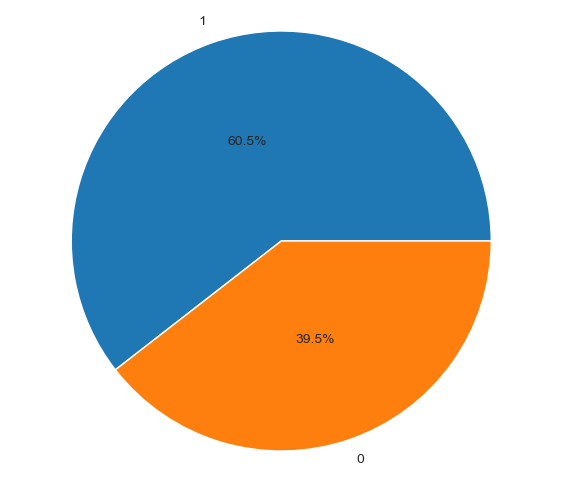

In [59]:
# Plotting a pie chart -

x = df['DISEASE'].value_counts().values
plt.figure(figsize=(7, 6))
plt.pie(x, center=(0, 0), radius=1.5, labels=df['DISEASE'].unique(), 
        autopct='%1.1f%%', pctdistance=0.5)
plt.axis('equal')
plt.show()

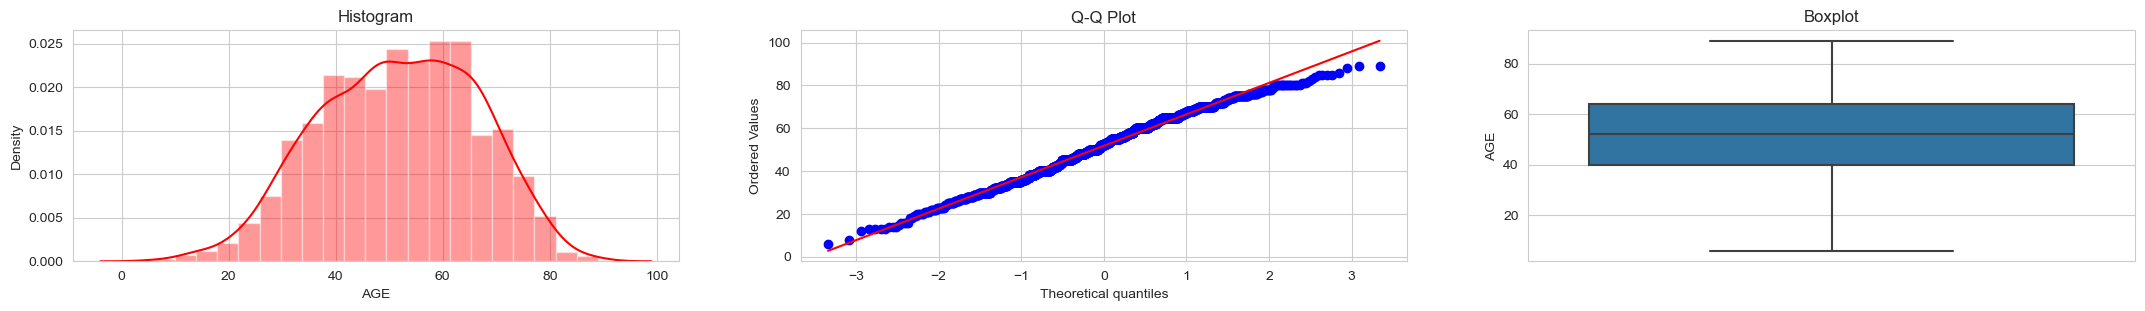

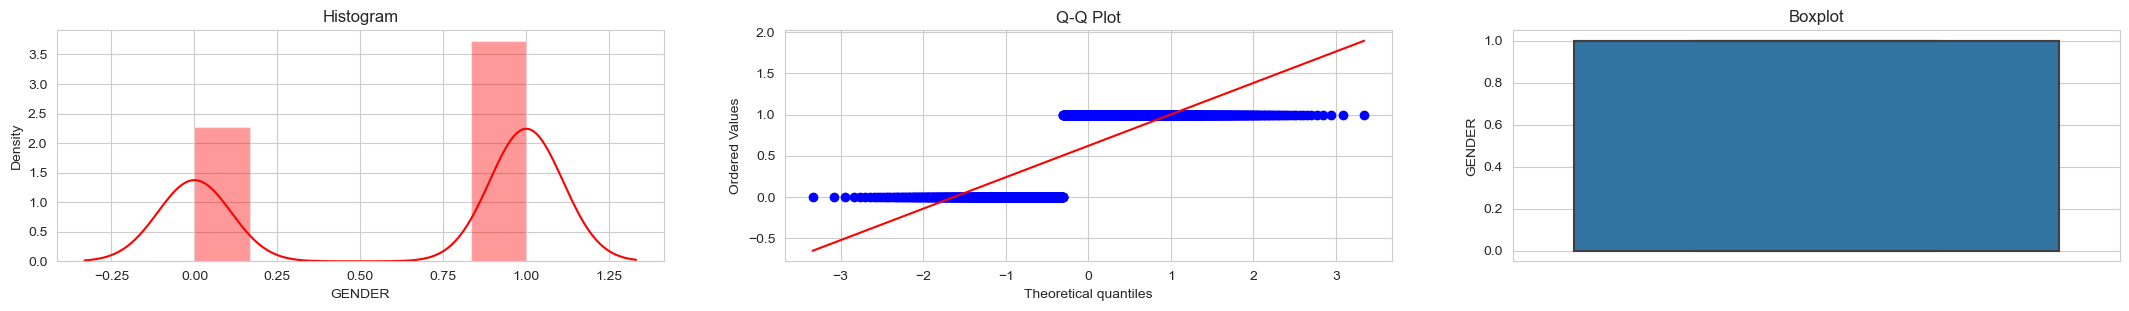

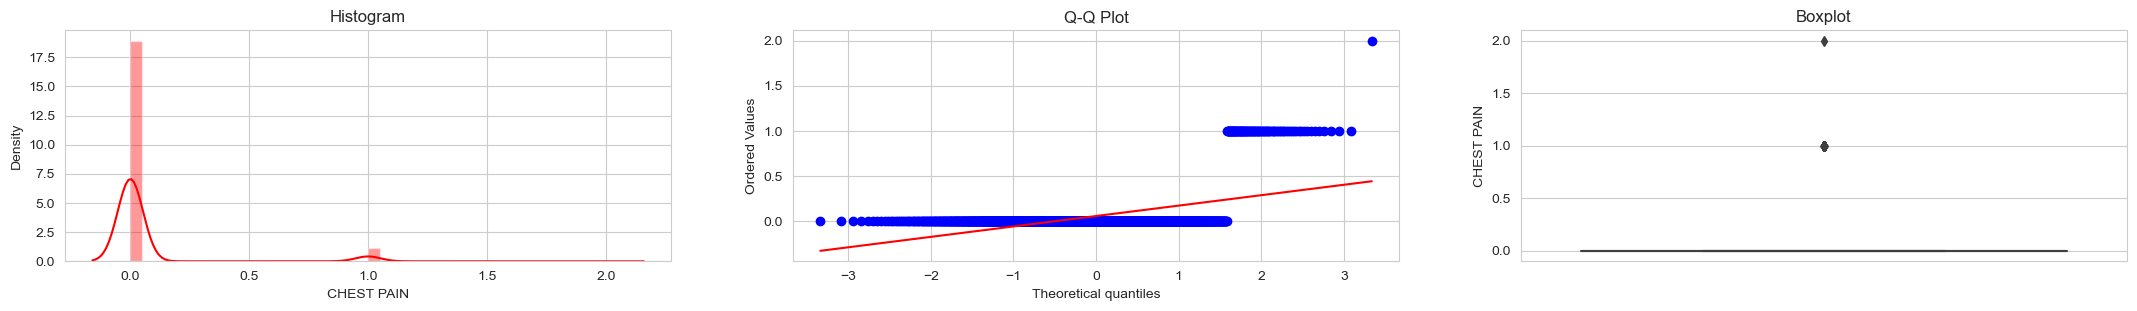

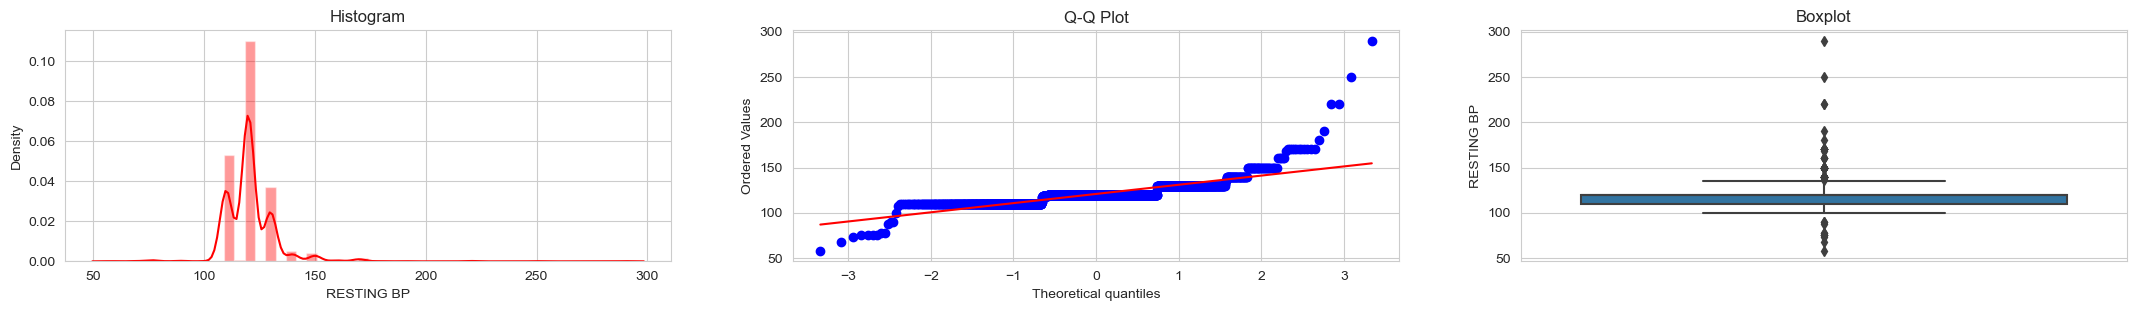

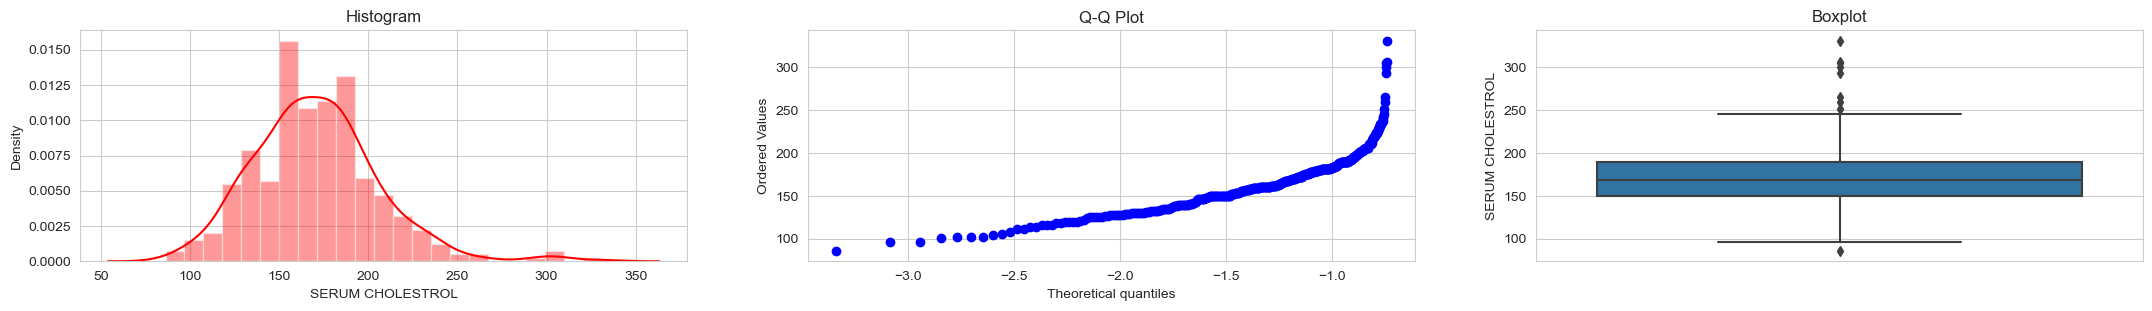

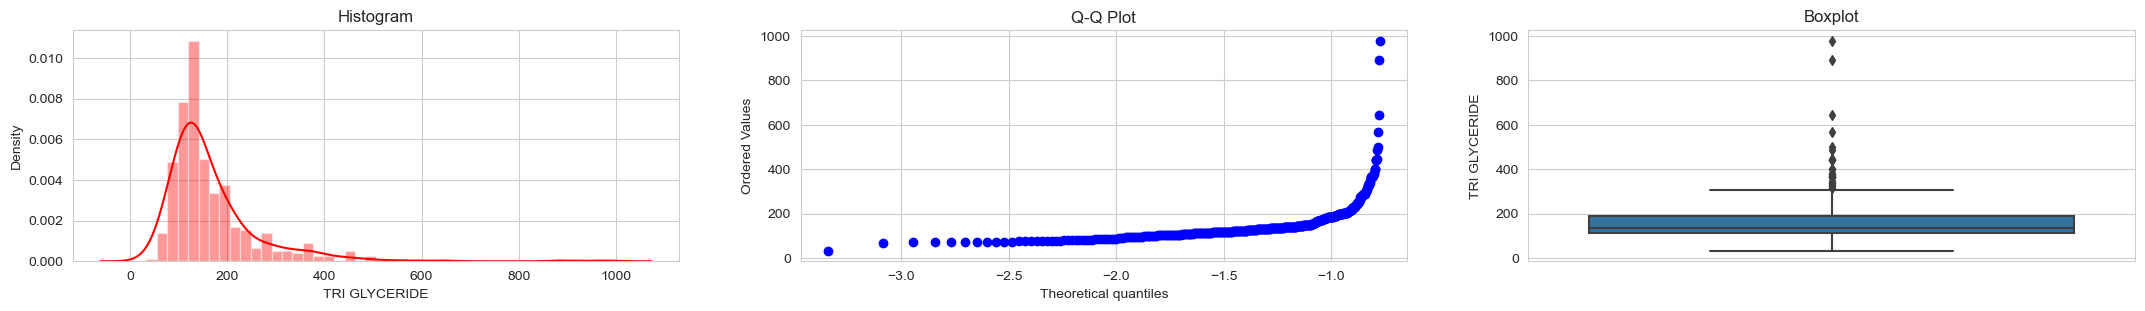

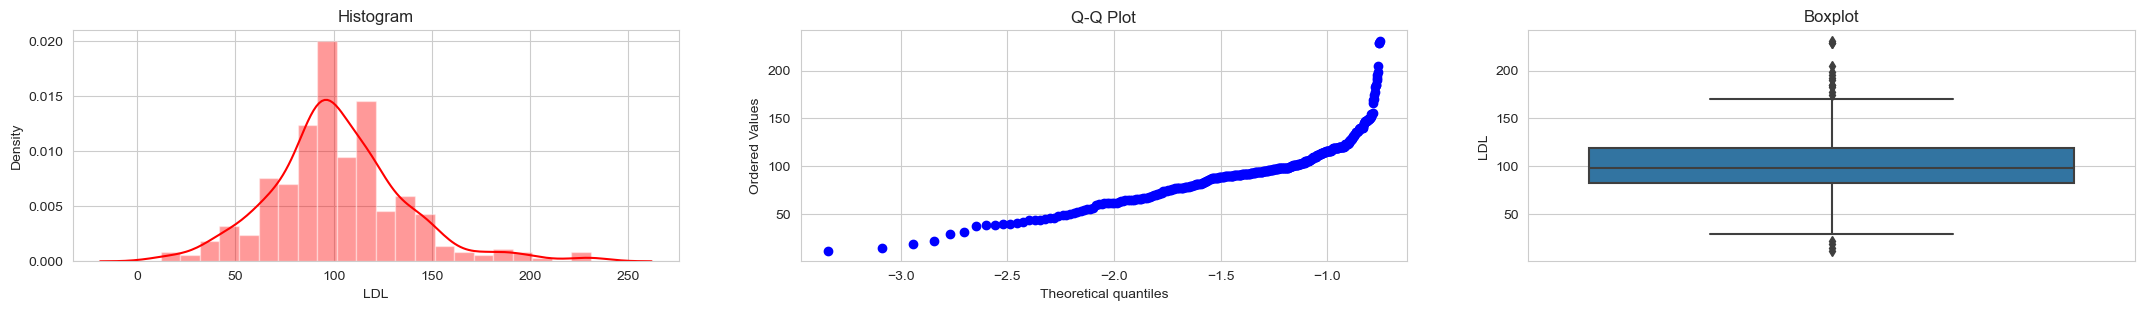

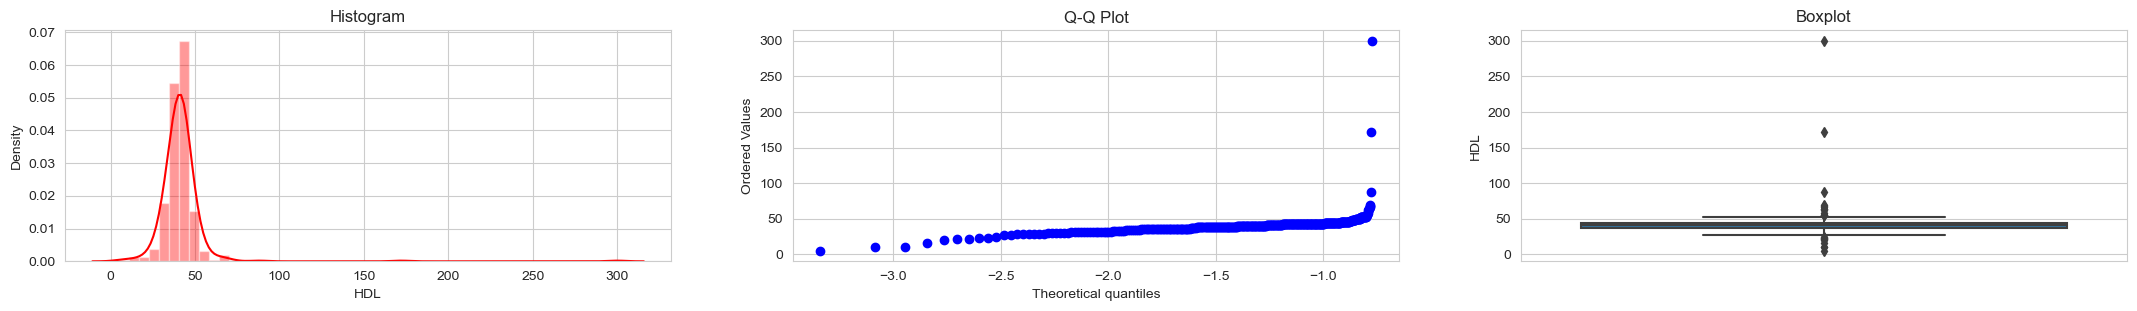

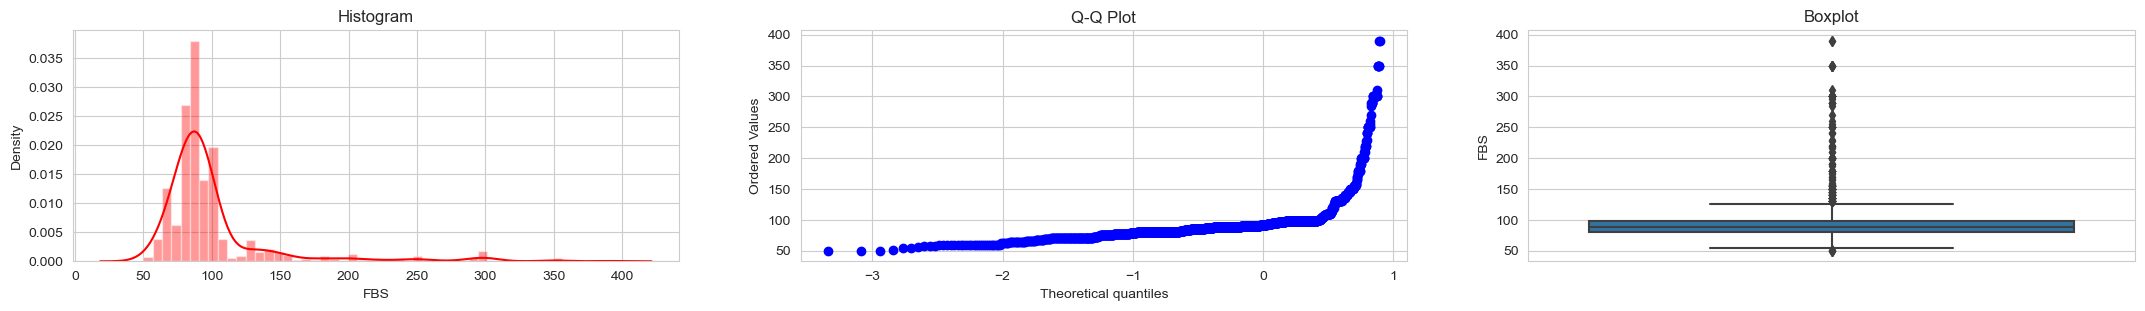

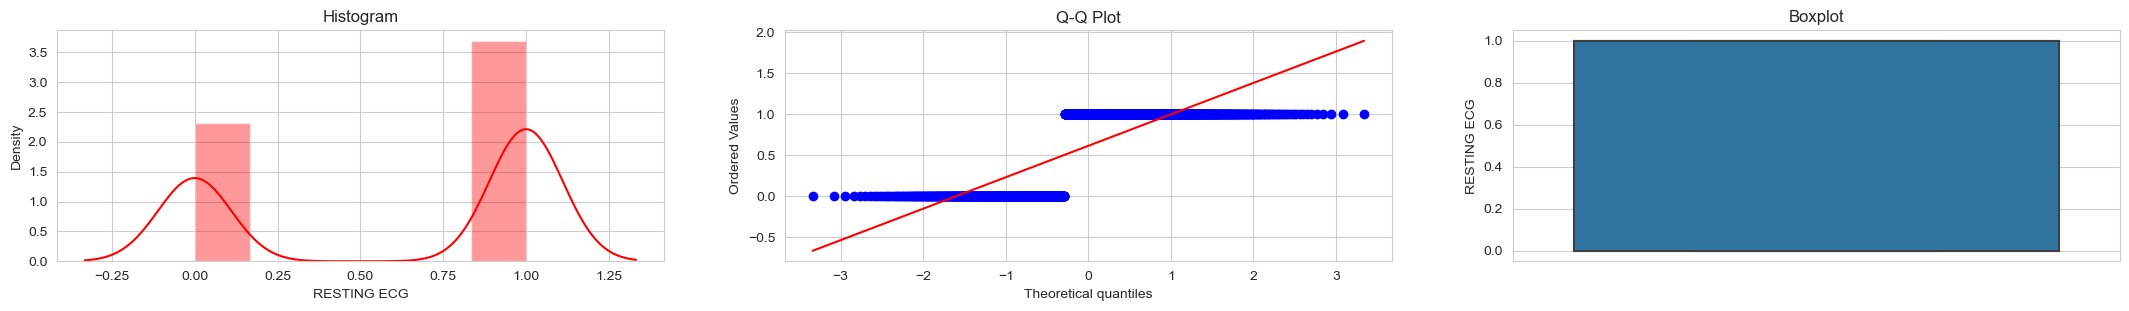

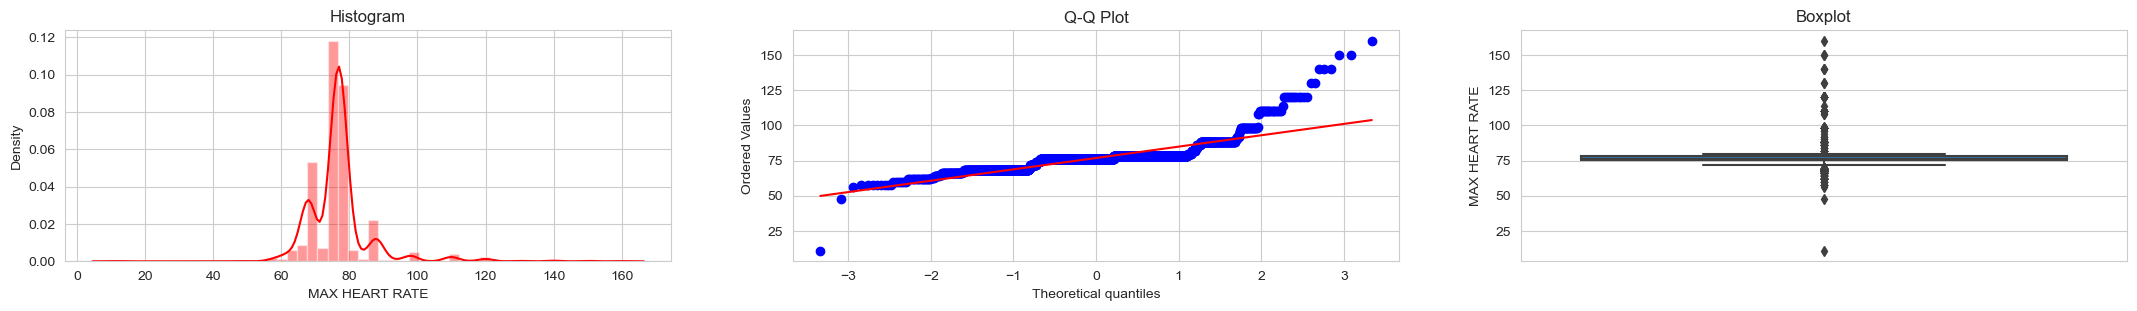

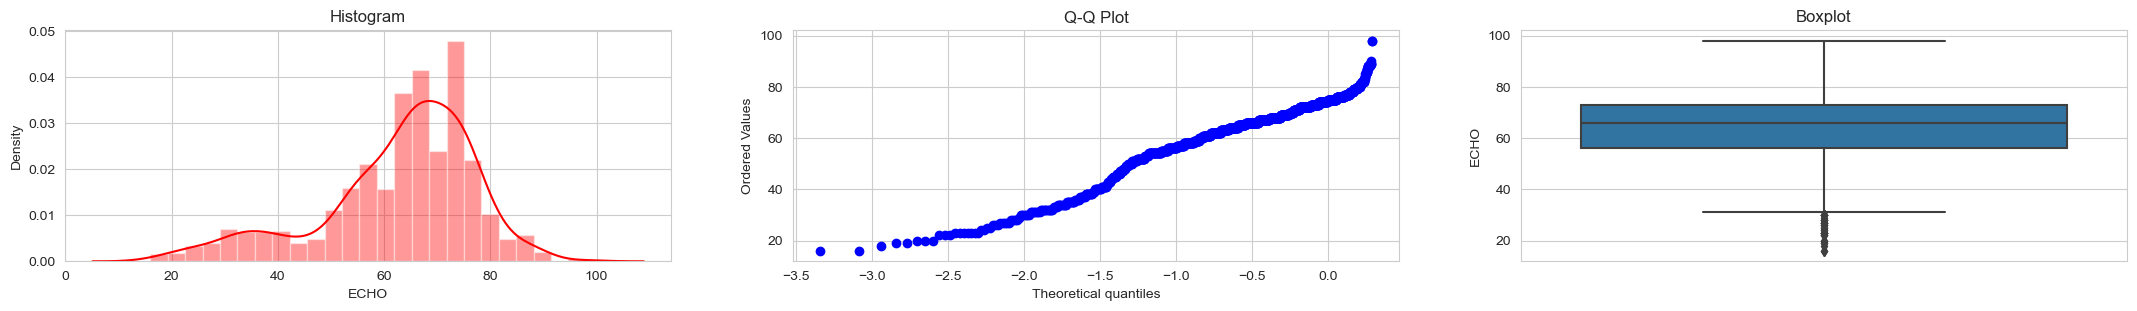

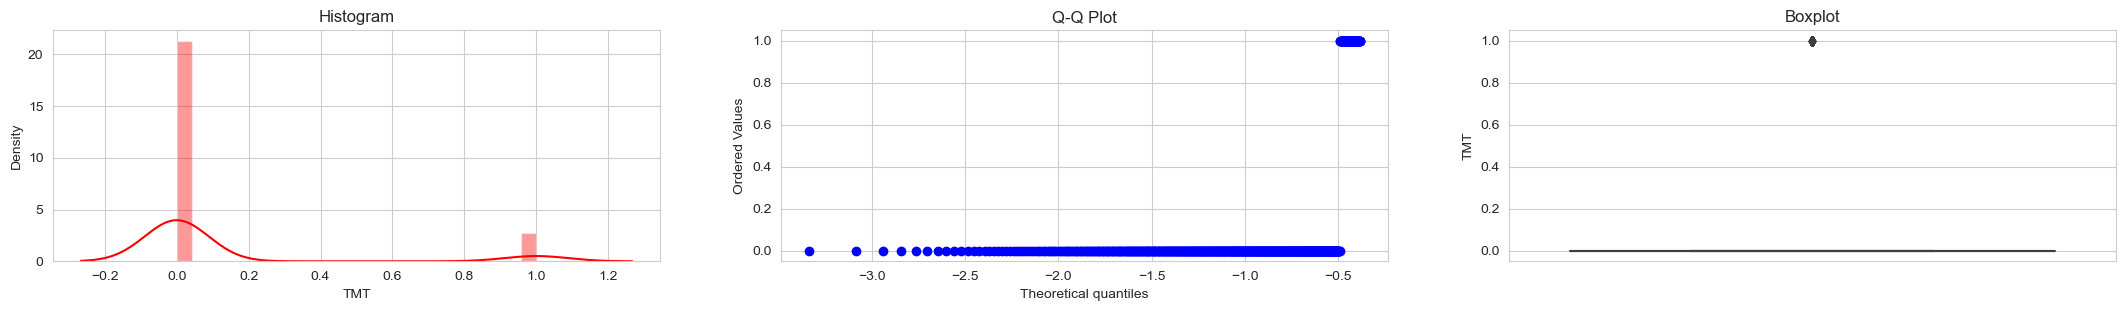

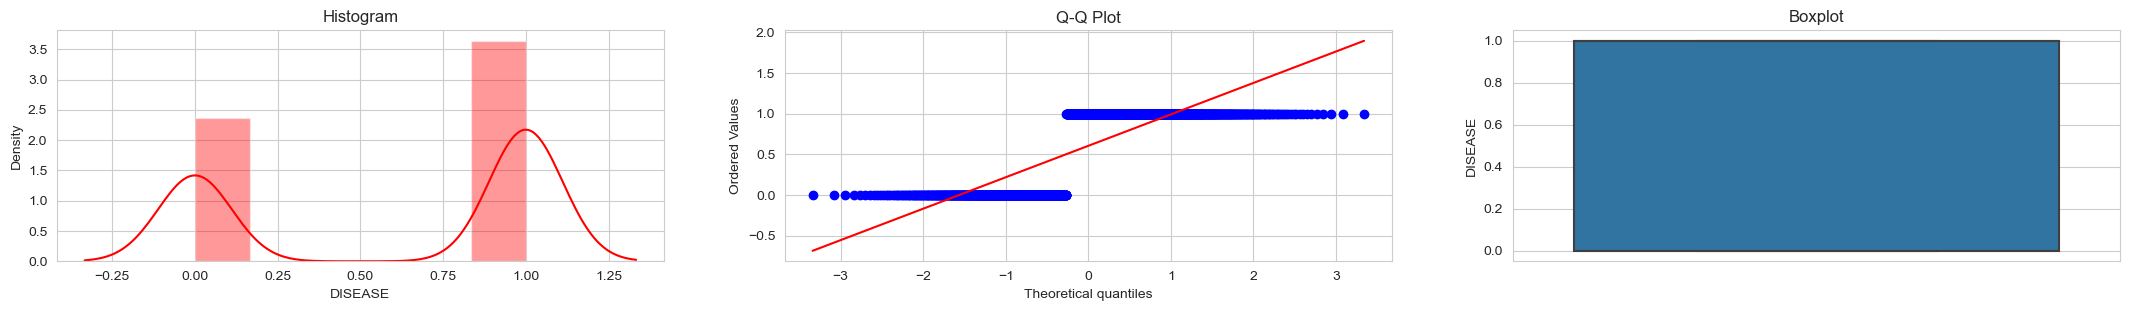

In [60]:
# Checking the distribution of data -

def dist_plot(data, col):
    fig = plt.figure(figsize=(15, 3))
    fig.subplots_adjust(right=1.5)
    
    plt.subplot(1, 3, 1)
    sns.distplot(data[col], kde=True, color='red')
    plt.title('Histogram')
    
    plt.subplot(1, 3, 2)
    stats.probplot(data[col], dist='norm', fit=True, plot=plt)
    plt.title('Q-Q Plot')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=data[col])
    plt.title('Boxplot')
    
    plt.show()

for col in df_final.columns:
    dist_plot(df, col)

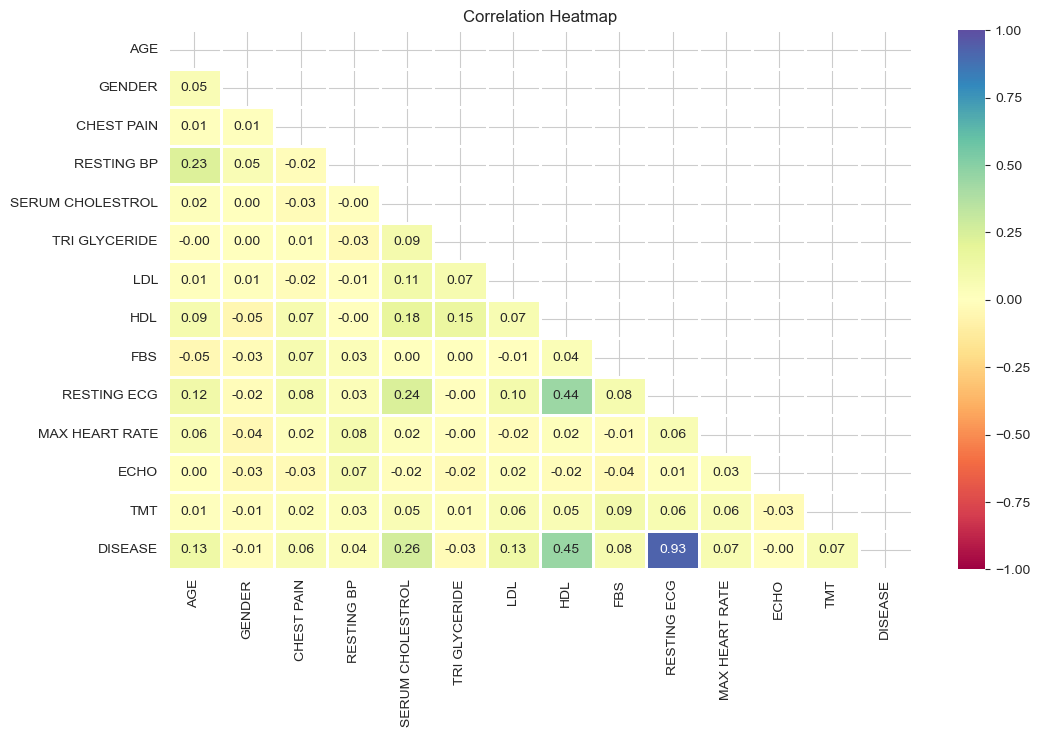

In [61]:
# Plotting the correlation heatmap -

plt.figure(figsize = (12, 7))
corr = df_final.corr(method='spearman')
mask = np.triu(np.ones_like(corr, dtype=bool))
cormat = sns.heatmap(corr, mask=mask, annot=True, 
                     cmap='Spectral', linewidths=1, 
                     vmin=-1, vmax=1, fmt=".2f")
cormat.set_title('Correlation Heatmap')
plt.show()

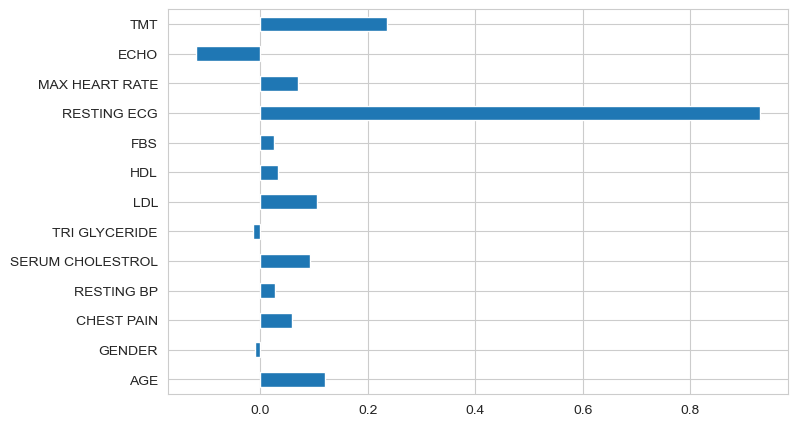

In [62]:
# Checking the correlation with target variable -

plt.figure(figsize=(8, 5))
x = df.drop(columns=['DISEASE'], axis=1)
x.corrwith(df['DISEASE']).plot(kind='barh')
plt.show()

In [63]:
# Checking for duplicate rows -

dup_rows = df_final[df_final.duplicated()]
print("No. of duplicate rows: ", dup_rows.shape[0])

No. of duplicate rows:  1


In [64]:
# Dropping duplicate rows -

df_final.drop_duplicates(inplace=True)
print("No. of rows remaining: ", df_final.shape[0])

No. of rows remaining:  1650


In [65]:
# Shuffling the data -

data = df_final.sample(frac=1, random_state=44)

In [66]:
# Saving the processed data -

data.to_csv(r'/Users/kumarpersonal/Downloads/Heart-Disease-Pred/Data/final_data_2.csv', index=False)

rows_with_nulls.to_csv(r'/Users/kumarpersonal/Downloads/Heart-Disease-Pred/Data/train2.csv', index=False)

rows_with_no_nulls[:90].to_csv(r'/Users/kumarpersonal/Downloads/Heart-Disease-Pred/Data/test2.csv', index=False)
rows_with_no_nulls[-5:].to_csv(r'/Users/kumarpersonal/Downloads/Heart-Disease-Pred/Data/val2.csv', index=False)